<h2> <center> Decision Tree </center></h2>

<center><img src="pics/dt.png"></center>

<h3> <font color="blue">Pros </h3>

1. Easy to interpret and understand.
2. Non - Paramteric : Helps to capture non linear patterns. Also does not depend on probability estimation.
3. Preprocessing and / or Normalization of data is not required. Though **binning** of continous variable helps. 

<h3> <font color="red">Cons</h3>

1. Can Overfit Easily. Use Prunning (same as early stopping) to reduce overfitting. OVerfitting means model is learning noise very well and getting so good with train data that it may fail on real / test datasets.
2. Unstable : Slight variation in data can make decision tree give different output. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

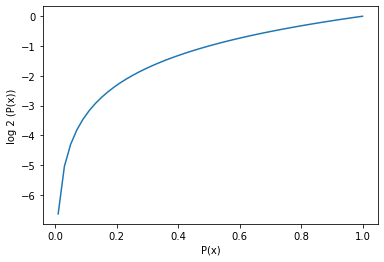

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.linspace(0.01,1), np.log2(np.linspace(0.01,1)))
ax.set_xlabel("P(x)")
ax.set_ylabel("log 2 (P(x))")
plt.show()

<h4> Steps to perform spilitting </h4>

In [3]:
# Calculate the entropy of dataset based on the "target" Variable. Let's say it is "E_Target"
# Calculate the entropy based on each feature while using "target" variable.
# V1 Entropy : V1_Entropy
# V2 Entropy : V2_Entropy
# Calculate "Information Gain" by subtracting the "E_target"

# E_Target - V1_Entropy = 0.12 (as an example)
# E_Target - V2_Entropy = 0.15 (as an example)

# We will select the V2 feature for splitting

# Repeat again from the split , we just create now

[Decision Tree Exmplanation](https://www.python-course.eu/Decision_Trees.php)

In [4]:
-(2/5*np.log2(2/5))-(3/5*np.log2(3/5))

0.9709505944546686

In [5]:
# Based on Shannon Entropy

<center><img src="pics/shannon_entropy.png"></center>

<center><img src="pics/Binary-Shannon-entropy.png"></center>

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import datasets
import pandas as pd
import numpy as np

In [19]:
credit_card = pd.read_csv('/Users/bt/Documents/GITHUB/creditcard.csv')

In [21]:
credit_card.drop('Time', axis=1,inplace=True)

In [24]:
credit_card.replace([np.inf,-np.inf],np.nan)

credit_card.dropna(inplace=True)

In [25]:
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [78]:
X = credit_card.drop('Class', axis=1)

y = credit_card['Class']

In [79]:
def myFillNa(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna(0)
    elif series.dtype is pd.np.dtype(object):
        return series.fillna('.')
    else:
        return series

In [80]:
X = X.apply(myFillNa)

<ipython-input-79-20d31816f1fd>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if series.dtype is pd.np.dtype(float):


In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [82]:
cols = X.columns[X.dtypes.eq('float')]

X[cols] = X[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [83]:
X_train, X_t, y_train,y_t = train_test_split(X,y,stratify=y,random_state=420,test_size=0.20)

X_valid, X_test, y_valid, y_test = train_test_split(X_t,y_t,stratify=y_t,test_size=0.2)

In [84]:
print(X_train.shape,X_valid.shape,X_test.shape)

(227845, 29) (45569, 29) (11393, 29)


In [85]:
print(y_train.shape,y_valid.shape,y_test.shape)

(227845,) (45569,) (11393,)


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dt = DecisionTreeClassifier()

In [101]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
predictions = dt.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11373
           1       0.65      0.65      0.65        20

    accuracy                           1.00     11393
   macro avg       0.82      0.82      0.82     11393
weighted avg       1.00      1.00      1.00     11393



In [121]:
print(pd.DataFrame(confusion_matrix(y_test,predcitions), columns=['pred:yes','pred:no'], index=['true:yes','true:no']))

          pred:yes  pred:no
true:yes     11366        7
true:no          7       13


In [122]:
from sklearn.model_selection import GridSearchCV

In [127]:
param_dict = {
    'max_depth': range(5,8),
    'min_samples_split':range(5,8),
    'min_samples_leaf' : range(2,5)
}

In [128]:
grid = GridSearchCV(
                    dt, 
                    param_grid=param_dict,
                    cv=2,
                    verbose=1,
                    n_jobs=-1
)

In [129]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   37.4s finished


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 8),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(5, 8)},
             verbose=1)

In [130]:
print(grid.best_params_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [131]:
print(grid.best_score_)

0.9994118812691803


In [132]:
new_model = DecisionTreeClassifier(**grid.best_params_)

In [133]:
new_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5)

In [134]:
predcitions = new_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])